<a href="https://colab.research.google.com/github/alina-bogdanovskaya/Probability_Statistics_Dec-2021/blob/lesson7/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [83]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

n = zp.size

x = zp
y = ks

In [85]:
b = (n*np.sum(x*y) - np.sum(x)*np.sum(y))/(n*np.sum(x**2) - np.sum(x)**2)
b

2.6205388824027653

In [86]:
a = np.mean(y) - b*np.mean(x)
a

444.17735732435955

In [87]:
y_hat = a + b*x
y_hat

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

In [88]:
mse = ((y - y_hat)**2).sum()/n
mse

6470.414201176658

In [89]:
rmse = np.sqrt(mse)
rmse

80.43888488272732

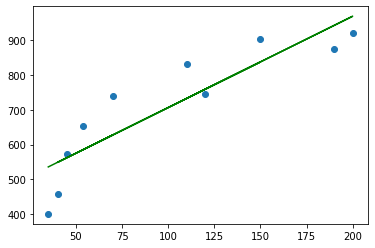

In [91]:
plt.scatter(x,y)
plt.plot(x, y_hat, color = 'g')

In [92]:
x1 = x.reshape(n,1)
x1

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [93]:
y1 = y.reshape(n,1)
y1

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [94]:
x2 = np.hstack([np.ones((n,1)), x1])
x2

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [95]:
B = np.linalg.inv(x2.T @ x2)@ x2.T@y
B

array([444.17735732,   2.62053888])

In [97]:
B_no_int = np.dot(np.linalg.inv(np.dot(x1.T, x1)), x1.T@y)
B_no_int

array([5.88982042])

Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [98]:
def mse_no_int(B1, y=y, x=x, n=n):
  return np.sum((B1*x - y)**2)/n

In [99]:
def mse_no_int_p(B1, y=y, x=x, n=n): 
  return 2/n * np.sum((B1*x - y)*x)

In [100]:
alpha = 1e-5
B1 = 1

In [101]:
for i in range(1000):
  B1 -= alpha*mse_no_int_p(B1)
  if i%100==0:
    print(f'Iteration: {i}, B1 = {B1}, mse = {mse_no_int(B1)}')

Iteration: 0, B1 = 2.347302, mse = 229405.42884192182
Iteration: 100, B1 = 5.8898204201326525, mse = 56516.8584157194
Iteration: 200, B1 = 5.889820420132688, mse = 56516.8584157194
Iteration: 300, B1 = 5.889820420132688, mse = 56516.8584157194
Iteration: 400, B1 = 5.889820420132688, mse = 56516.8584157194
Iteration: 500, B1 = 5.889820420132688, mse = 56516.8584157194
Iteration: 600, B1 = 5.889820420132688, mse = 56516.8584157194
Iteration: 700, B1 = 5.889820420132688, mse = 56516.8584157194
Iteration: 800, B1 = 5.889820420132688, mse = 56516.8584157194
Iteration: 900, B1 = 5.889820420132688, mse = 56516.8584157194


Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [102]:
def mse_int(B0, B1, y=y, x=x, n=n):
  return np.sum((B0 + B1*x - y)**2)/n

In [103]:
def mse_int_p(B0, B1, y=y, x=x, n=n): 
  return 2/n * np.sum((B0 + B1*x - y)*x), 2/n * np.sum(B0 + B1*x - y)

In [104]:
alpha = 1/25000
B0 = 400
B1 = 1

In [105]:
for i in range(1000001):
  d_B1, d_B0 = mse_int_p(B0, B1)
  B1 -= alpha*d_B1
  B0 -= alpha*d_B0
  if i%50000==0:
    print(f'Iteration: {i}, B0 = {B0}, B1 = {B1}, mse = {mse_int(B0, B1)}')

Iteration: 0, B0 = 400.01668, B1 = 3.1444080000000003, mse = 7509.754541855978
Iteration: 50000, B0 = 428.1667268145819, B1 = 2.738384201661101, mse = 6535.438737678039
Iteration: 100000, B0 = 438.3728314282218, B1 = 2.6632627593266567, mse = 6478.960811463798
Iteration: 150000, B0 = 442.07297293684906, B1 = 2.636028081896626, mse = 6471.537539401434
Iteration: 200000, B0 = 443.4144296142202, B1 = 2.626154367659108, mse = 6470.56184904229
Iteration: 250000, B0 = 443.9007639917182, B1 = 2.622574731619943, mse = 6470.433607524404
Iteration: 300000, B0 = 444.07708062625665, B1 = 2.621276963235678, mse = 6470.416751882903
Iteration: 350000, B0 = 444.1410028103646, B1 = 2.620806467699022, mse = 6470.414536433066
Iteration: 400000, B0 = 444.16417728639505, B1 = 2.620635893309414, mse = 6470.414245241654
Iteration: 450000, B0 = 444.1725790071245, B1 = 2.620574052930231, mse = 6470.414206968415
Iteration: 500000, B0 = 444.1756249837028, B1 = 2.620551633195911, mse = 6470.414201937905
Iteration